# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#Testing the information provided by the endpoint to understand the needed keys of required data
url = 'https://api.openweathermap.org/data/2.5/weather?'
l = 'bilibino'
query_url = url + 'appid=' + weather_api_key +'&q=' + l + '&units=metric'

response = requests.get(query_url)
weather_json = response.json()

weather_json

{'coord': {'lon': 166.4372, 'lat': 68.0546},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 1.51,
  'feels_like': -2.2,
  'temp_min': 1.51,
  'temp_max': 1.51,
  'pressure': 1012,
  'humidity': 89,
  'sea_level': 1012,
  'grnd_level': 977},
 'visibility': 10000,
 'wind': {'speed': 3.66, 'deg': 32, 'gust': 5.47},
 'snow': {'1h': 0.14},
 'clouds': {'all': 100},
 'dt': 1691352197,
 'sys': {'country': 'RU', 'sunrise': 1691336061, 'sunset': 1691403955},
 'timezone': 43200,
 'id': 2126682,
 'name': 'Bilibino',
 'cod': 200}

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key +'&q=' + city +'&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | tibanbang
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | pocitos
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | biskra
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | verkhnevilyuysk
Processing Record 14 of Set 1 | tillaberi
Processing Record 15 of Set 1 | necochea
Processing Record 16 of Set 1 | oban
Processing Record 17 of Set 1 | bouillargues
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | lundazi
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | yashkul'
Processing Record 22 of Set 1 | taquari
Processing Recor

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,10.42,67,43,18.85,SH,1691352199
1,tibanbang,6.6315,126.1055,27.47,79,100,3.52,PH,1691352200
2,bredasdorp,-34.5322,20.0403,10.56,93,0,1.26,ZA,1691352201
3,albany,42.6001,-73.9662,28.78,45,100,0.45,US,1691352080
4,pocitos,-34.9097,-56.1522,18.08,87,75,6.17,UY,1691352132


In [8]:
# Export the City_Data into a csv

city_data_df.to_csv("weather_output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("weather_output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,10.42,67,43,18.85,SH,1691352199
1,tibanbang,6.6315,126.1055,27.47,79,100,3.52,PH,1691352200
2,bredasdorp,-34.5322,20.0403,10.56,93,0,1.26,ZA,1691352201
3,albany,42.6001,-73.9662,28.78,45,100,0.45,US,1691352080
4,pocitos,-34.9097,-56.1522,18.08,87,75,6.17,UY,1691352132


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

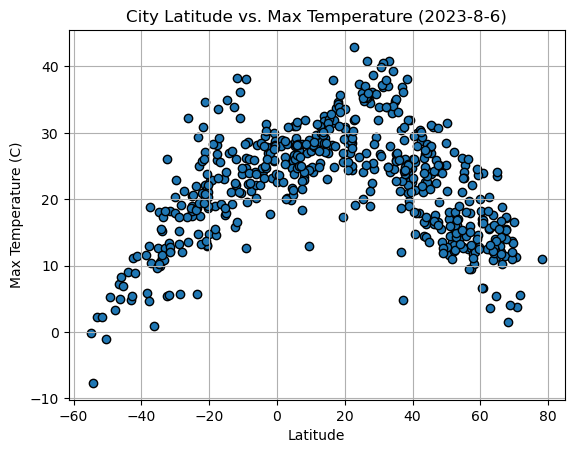

In [30]:
# Build scatter plot for latitude vs. temperature
temp = city_data_df['Max Temp']
lat = city_data_df['Lat']
plt.scatter(lat,temp, marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-8-6)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
# Save the figure
plt.savefig("weather_output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

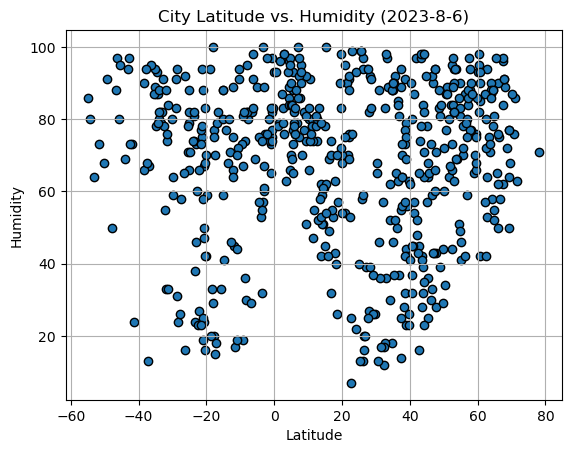

In [29]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(lat,humidity, marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-8-6)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig("weather_output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

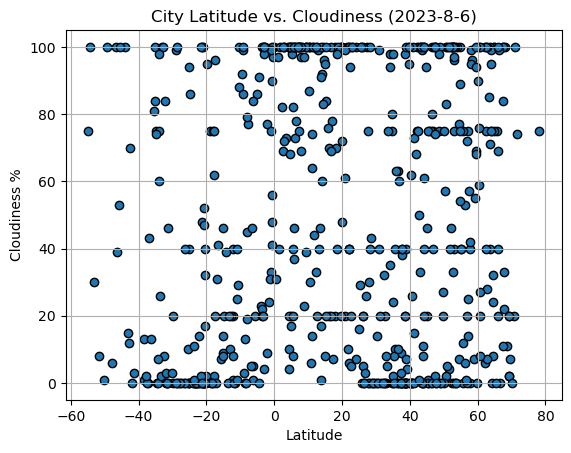

In [28]:
# Build the scatter plots for latitude vs. humidity
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(lat,cloudiness, marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-8-6)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

# Save the figure
plt.savefig("weather_output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

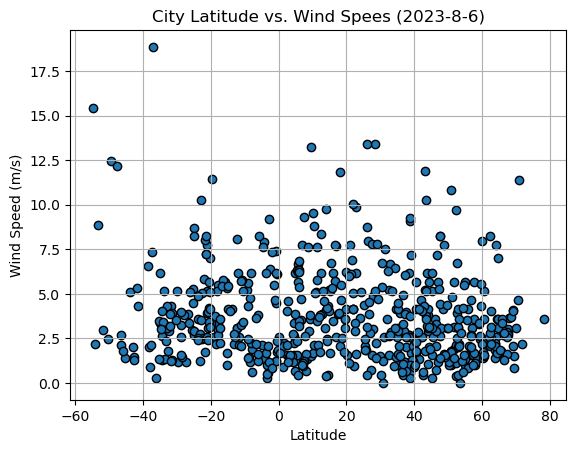

In [27]:
# Build the scatter plots for latitude vs. humidity
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(lat,wind_speed, marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Spees (2023-8-6)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("weather_output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
##Note This was made with the help of Carl in a study group

def line(x_values, y_values, coord, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tibanbang,6.6315,126.1055,27.47,79,100,3.52,PH,1691352200
3,albany,42.6001,-73.9662,28.78,45,100,0.45,US,1691352080
6,bethel,41.3712,-73.4140,30.02,54,15,1.34,US,1691352007
9,anadyr,64.7500,177.4833,11.28,81,100,7.00,RU,1691352204
10,biskra,34.8504,5.7281,34.73,18,0,1.03,DZ,1691352205


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,10.42,67,43,18.85,SH,1691352199
2,bredasdorp,-34.5322,20.0403,10.56,93,0,1.26,ZA,1691352201
4,pocitos,-34.9097,-56.1522,18.08,87,75,6.17,UY,1691352132
5,waitangi,-43.9535,-176.5597,8.96,69,100,5.11,NZ,1691352202
7,port-aux-francais,-49.3500,70.2167,5.21,91,100,12.47,TF,1691352203


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.39822317115093947


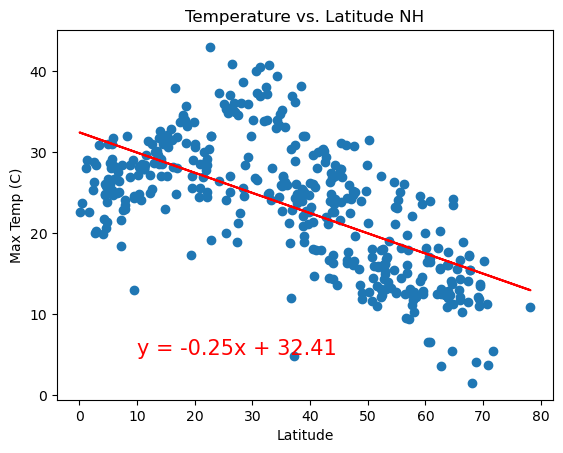

In [22]:
# Linear regression on Northern Hemisphere
y_values = northern_hemi_df['Max Temp']
x_values = northern_hemi_df['Lat']
x_label = 'Latitude'
y_label = 'Max Temp (C)'
coord = (10,5)
title = "Temperature vs. Latitude NH"
line(x_values,y_values,coord,x_label,y_label, title)

The r-value is: 0.6160145429414747


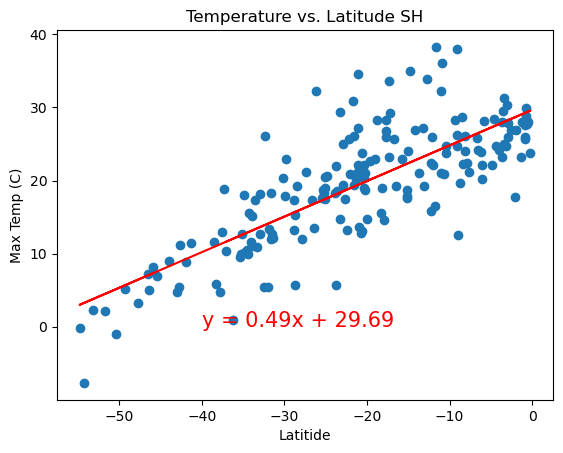

In [23]:
# Linear regression on Southern Hemisphere
y_values = southern_hemi_df['Max Temp']
x_values = southern_hemi_df['Lat']
coord = (-40,0)
x_label = 'Latitide'
y_label = 'Max Temp (C)'
title = 'Temperature vs. Latitude SH'
line(x_values,y_values,coord,x_label,y_label, title)

**Discussion about the linear relationship:** Y
The Northern Hemisphere has a very strong negative correlation between latitude and max temperature. The Southern Hemisphere has a very strong positive correlation between latitude and max temperature. As we get closer to the equator, the higher the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 1.6361157435816518e-05


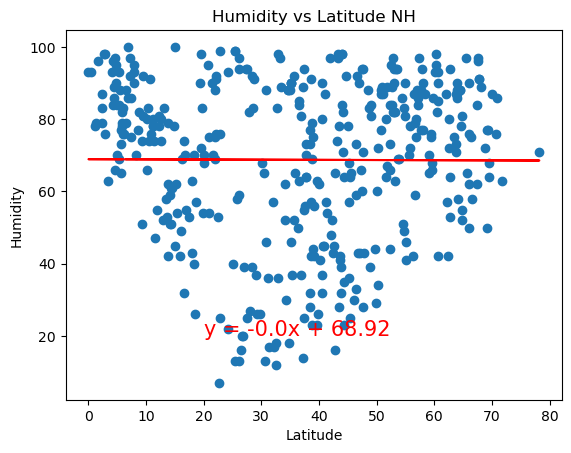

In [24]:
# Northern Hemisphere
y_values = northern_hemi_df['Humidity']
x_values = northern_hemi_df['Lat']
coord = (20,20)
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Humidity vs Latitude NH'
line(x_values,y_values,coord,x_label,y_label, title)

The r-value is: 0.007156682005053103


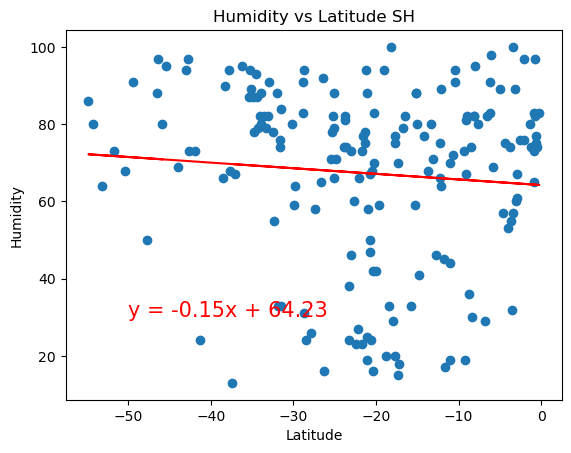

In [25]:
# Southern Hemisphere
y_values = southern_hemi_df['Humidity']
x_values = southern_hemi_df['Lat']
coord = (-50,30)
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Humidity vs Latitude SH'
line(x_values,y_values,coord,x_label,y_label, title)

**Discussion about the linear relationship:** 
Both Northern and Southern Hemispheres have insignificant correlations between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.022706085866904764


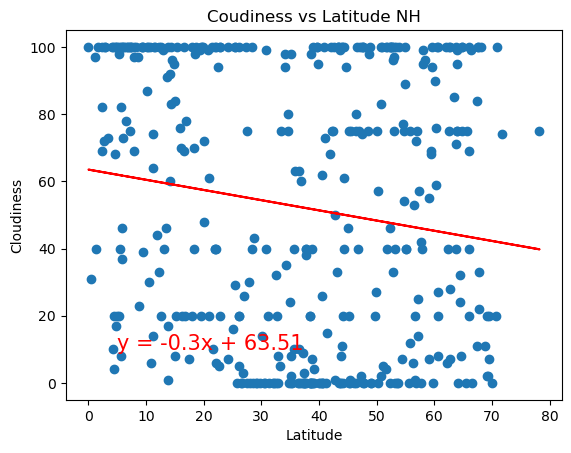

In [26]:
# Northern Hemisphere
y_values = northern_hemi_df['Cloudiness']
x_values = northern_hemi_df['Lat']
coord = (5,10)
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Coudiness vs Latitude NH'
line(x_values,y_values,coord,x_label,y_label, title)

The r-value is: 0.008747291744482619


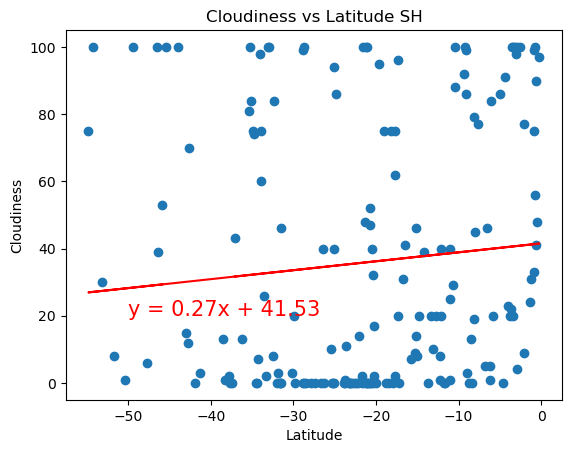

In [31]:
# Southern Hemisphere
y_values = southern_hemi_df['Cloudiness']
x_values = southern_hemi_df['Lat']
coord = (-50,20)
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Cloudiness vs Latitude SH'
line(x_values,y_values,coord,x_label,y_label, title)

**Discussion about the linear relationship:** 
Although a negligible coorelation, as we get closer to the equator, the cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.020635130007466376


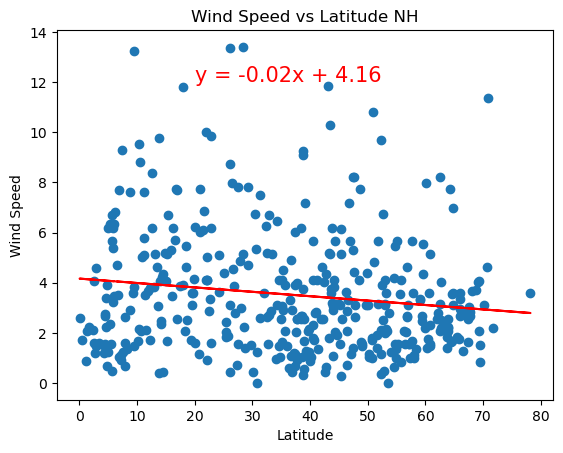

In [33]:
# Northern Hemisphere
y_values= northern_hemi_df['Wind Speed']
x_values = northern_hemi_df['Lat']
coord = (20,12)
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Wind Speed vs Latitude NH'
line(x_values,y_values,coord,x_label,y_label, title)

The r-value is: 0.013508311241027162


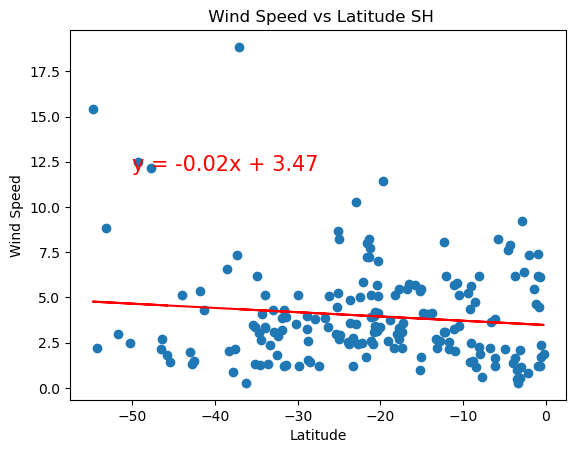

In [34]:
# Southern Hemisphere
y_values = southern_hemi_df['Wind Speed']
x_values = southern_hemi_df['Lat']
coord = (-50,12)
x_label = 'Latitude'
y_label = 'Wind Speed'
title = ' Wind Speed vs Latitude SH'
line(x_values,y_values,coord,x_label,y_label, title)

**Discussion about the linear relationship:** 
Although there is a weak negative coorelation between wind speed and latitude, as the latitude rises, the slower the wind speed is.